<a href="https://colab.research.google.com/github/Rishi500/Face_Recog/blob/master/FER_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Rishi J

In [1]:
!pip install kaggle


In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rishi500","key":"31bae42537b6b7321ed7f577ebf60bb0"}'}

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-02 20:35:01          60481  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            658  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           6504  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             74  
doaaalsenani/usa-cers-dataset                               US C

In [8]:
!kaggle datasets list -s 'face-expression-recognition-dataset'

ref                                                      title                                           size  lastUpdated          downloadCount  
-------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
crawford/gene-expression                                 Gene expression dataset (Golub et al.)           1MB  2017-08-08 20:56:48           6354  
piotrgrabo/breastcancerproteomes                         Breast Cancer Proteomes                          5MB  2019-11-14 05:15:12           8312  
ruslankl/mice-protein-expression                         Mice Protein Expression                        423KB  2018-05-06 15:09:39           1741  
ahmedmoorsy/facial-expression                            Facial Expression                              193MB  2018-06-11 16:28:17           1516  
nicolejyt/facialexpressionrecognition                    FER2013                                         97MB  2

In [9]:
!kaggle datasets download 'jonathanoheix/face-expression-recognition-dataset'

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip -q -n /content/face-expression-recognition-dataset.zip

In [11]:
!ls

 example_submission.csv			   images	      test.csv.zip
 face-expression-recognition-dataset.zip  'kaggle (1).json'   train.csv
 fer2013.tar.gz				   kaggle.json	      train.csv.zip
 icml_face_data.csv.zip			   sample_data


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = 'content/images/images/train'

In [0]:
import os
os.chdir('images')

In [31]:
os.curdir

'.'

In [32]:
!ls

images	train  validation


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path='.', train="train", valid='validation',
         size=224, num_workers=4).normalize(imagenet_stats)

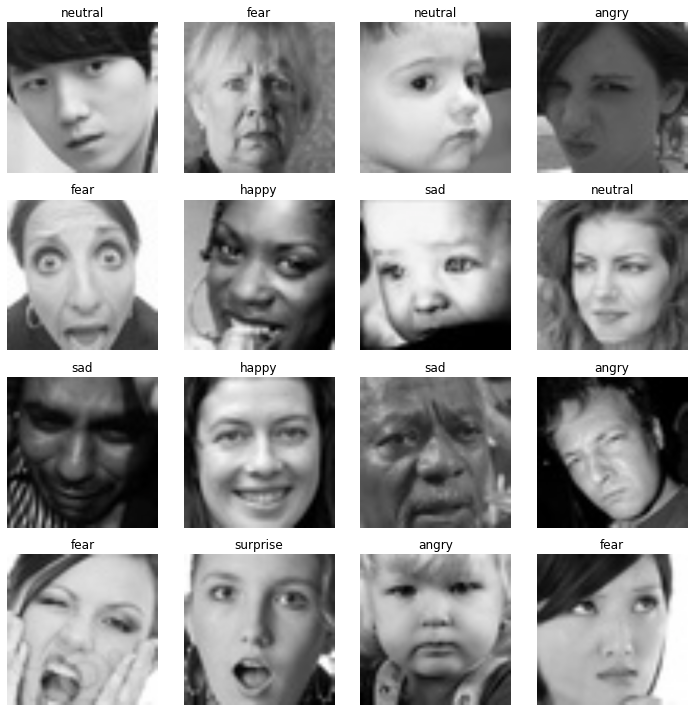

In [36]:
data.show_batch(rows=4,figsize=(10,10))


In [37]:
learner=cnn_learner(data,models.resnet50,metrics=error_rate)
learner.fit_one_cycle(4)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.592531,1.402938,0.523917,02:42
1,1.294950,1.198333,0.451316,02:41
2,1.140563,1.100166,0.409708,02:41
3,0.998237,1.070508,0.394566,02:41


In [0]:
learner.save('stage-1')

In [38]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


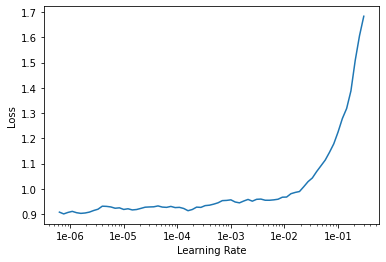

In [41]:
learner.recorder.plot()

In [49]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (28821 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: .;

Valid: LabelList (7066 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
angry,angry,angry,angry,angry
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): 

In [0]:
learner.unfreeze()

In [51]:
learner.fit_one_cycle(4,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.023328,1.003772,0.377441,03:06
1,0.872445,0.956201,0.346872,03:06
2,0.427174,1.025114,0.335551,03:06
3,0.089347,1.109175,0.325078,03:06


In [52]:
interp=ClassificationInterpretation.from_learner(learner)

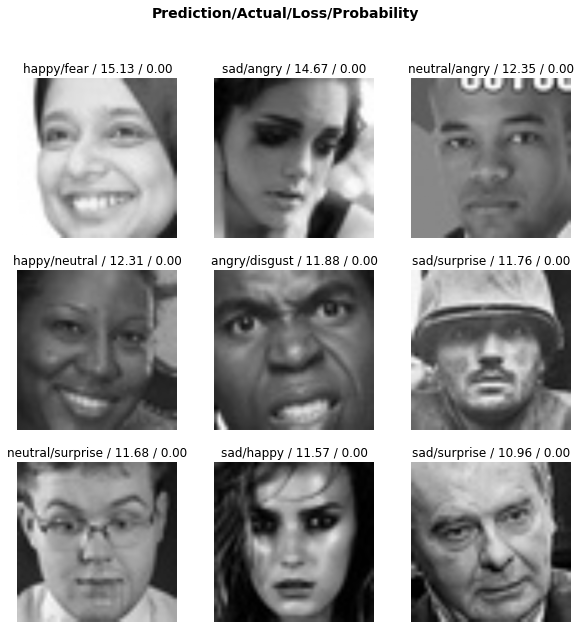

In [53]:
interp.plot_top_losses(9,figsize=(10,10))

In [54]:
interp.most_confused(min_val=10)

[('fear', 'sad', 203),
 ('sad', 'neutral', 195),
 ('neutral', 'sad', 188),
 ('sad', 'fear', 133),
 ('angry', 'sad', 129),
 ('fear', 'angry', 118),
 ('fear', 'neutral', 113),
 ('sad', 'angry', 108),
 ('angry', 'neutral', 95),
 ('happy', 'neutral', 94),
 ('angry', 'fear', 89),
 ('neutral', 'happy', 84),
 ('neutral', 'angry', 71),
 ('surprise', 'fear', 65),
 ('fear', 'surprise', 56),
 ('neutral', 'fear', 55),
 ('happy', 'sad', 51),
 ('surprise', 'happy', 47),
 ('surprise', 'neutral', 44),
 ('angry', 'happy', 43),
 ('happy', 'angry', 41),
 ('sad', 'happy', 39),
 ('fear', 'happy', 37),
 ('happy', 'fear', 37),
 ('happy', 'surprise', 24),
 ('surprise', 'angry', 24),
 ('disgust', 'angry', 19),
 ('neutral', 'surprise', 19),
 ('surprise', 'sad', 16),
 ('angry', 'surprise', 12),
 ('disgust', 'sad', 10)]

In [57]:
from fastai.widgets import *
ds, idxs = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Valid)
ImageCleaner(ds,idxs,'')

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [59]:
ds, idxs = DatasetFormatter().from_toplosses(learner, ds_type=DatasetType.Train)
ImageCleaner(ds,idxs,'')

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
learner.save('stage-2')

In [61]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


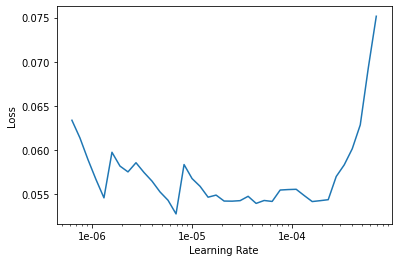

In [62]:
learner.recorder.plot()

In [0]:
learner.unfreeze()

In [64]:
learner.fit_one_cycle(4,max_lr=slice(2e-5,(1e-4)/1.2))

epoch,train_loss,valid_loss,error_rate,time
0,0.085652,1.287993,0.339655,03:06
1,0.113476,1.368409,0.341211,03:06
2,0.039190,1.371221,0.322247,03:05
3,0.015813,1.341618,0.323663,03:06


In [0]:
learner.save('stage-2')